In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
documents = ["Far far away, behind the word mountains, far from the countries Vokalia and Consonantia, there live the blind texts. ",
"Separated they live in Bookmarksgrove right at the coast of the Semantics, a large language ocean. ",
"A small river named Duden flows by their place and supplies it with the necessary regelialia. ", 
"It is a paradisematic country, in which roasted parts of sentences fly into your mouth."]

TF-IDF Vectorization

In [19]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

Keyword Extraction

In [20]:
feature_names = vectorizer.get_feature_names_out()
for doc_idx, doc in enumerate(documents):
    print(f"\nTop keywords in Document {doc_idx + 1}:")
    scores = tfidf_matrix[doc_idx].toarray()[0]
    top_indices = scores.argsort()[-5:][::-1]
    for idx in top_indices:
        print(f"{feature_names[idx]}: {scores[idx]:.4f}")



Top keywords in Document 1:
far: 0.7147
word: 0.2382
vokalia: 0.2382
texts: 0.2382
blind: 0.2382

Top keywords in Document 2:
semantics: 0.3406
separated: 0.3406
bookmarksgrove: 0.3406
coast: 0.3406
ocean: 0.3406

Top keywords in Document 3:
small: 0.3333
supplies: 0.3333
duden: 0.3333
necessary: 0.3333
river: 0.3333

Top keywords in Document 4:
sentences: 0.3780
roasted: 0.3780
fly: 0.3780
country: 0.3780
paradisematic: 0.3780


Document Similarity

In [21]:
similarity_matrix = cosine_similarity(tfidf_matrix)

Visulaization

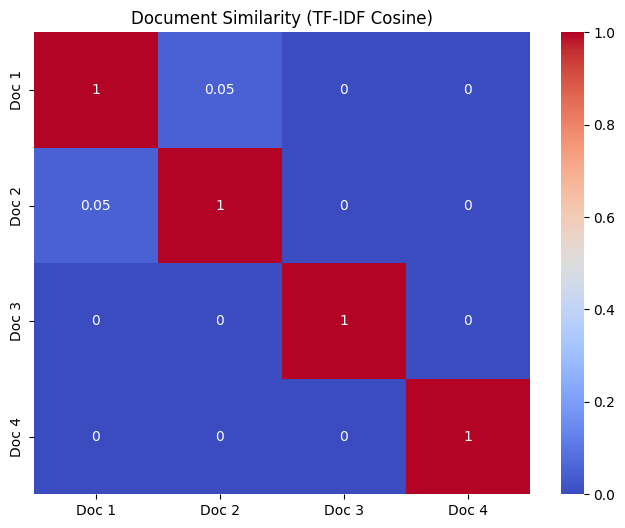

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', xticklabels=[f'Doc {i+1}' for i in 
range(len(documents))], yticklabels=[f'Doc {i+1}' for i in range(len(documents))])
plt.title("Document Similarity (TF-IDF Cosine)")
plt.show()